In [1]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
import os

from model_utils import *

In [2]:
%store -r train_label
%store -r val_label
%store -r test_label

%store -r test_all
%store -r train_all
%store -r val_all

In [20]:
test_all = test_all.drop("series_id",axis =1)
train_all = train_all.drop("series_id",axis =1)
val_all = val_all.drop("series_id",axis =1)

In [21]:
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

X_train, y_train = train_all, train_label
X_val, y_val = val_all, val_label
X_test, y_test = test_all, test_label

model = HistGradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)




test_probabilities = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC curve
val_probabilities = model.predict_proba(X_val)[:, 1] 



Validation Accuracy: 0.7500229287812873
Test Accuracy: 0.7486193875786032


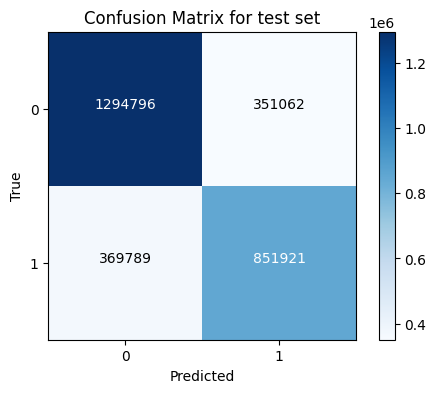

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78   1645858
           1       0.71      0.70      0.70   1221710

    accuracy                           0.75   2867568
   macro avg       0.74      0.74      0.74   2867568
weighted avg       0.75      0.75      0.75   2867568



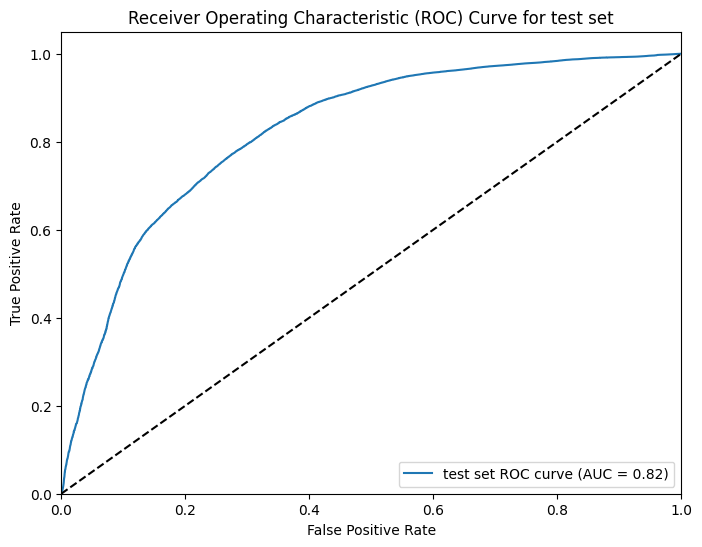

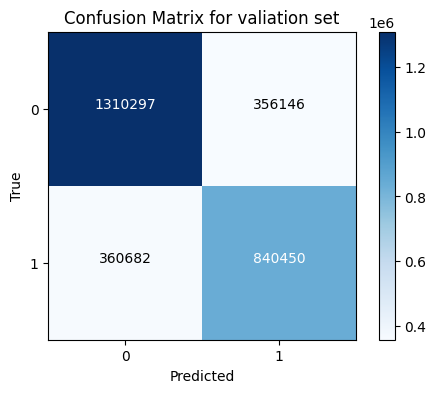

Classification Report for valiation set:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79   1666443
           1       0.70      0.70      0.70   1201132

    accuracy                           0.75   2867575
   macro avg       0.74      0.74      0.74   2867575
weighted avg       0.75      0.75      0.75   2867575



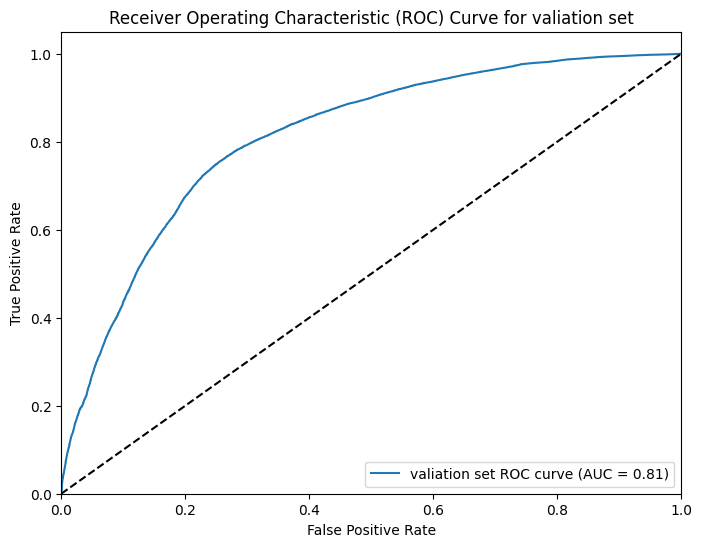

In [22]:
evaluate_model("test",y_test,test_predictions,test_probabilities)
evaluate_model("valiation",y_val,val_predictions,val_probabilities)

In [55]:
import pandas as pd
from features_utils import *
from eda_utils import *
kaggle_test = pd.read_parquet("../data/test_series.parquet")

In [33]:
kaggle_test.isna().sum()

series_id    0
step         0
timestamp    0
anglez       0
enmo         0
dtype: int64

In [56]:
kaggle_test = clean_df(kaggle_test)
kaggle_test = Categorize_hours(kaggle_test,4)
kaggle_test = add_features(kaggle_test)
kaggle_test = kaggle_test.drop(columns=["series_id","timestamp","date","time","step"],axis = 1)

window_size = 5

kaggle_test = pd.concat([kaggle_test,Create_lag_features(kaggle_test,window_size,"enmo","anglez")],axis = 1)

In [57]:
kaggle_test

,anglez,enmo,hour,day_quartile,day of year,day of week,month,days in month,minute,enmo lag_1,enmo lag_2,enmo lag_3,enmo lag_4,enmo lag_5,anglez lag_1,anglez lag_2,anglez lag_3,anglez lag_4,anglez lag_5
0,2.636700,0.0217,15,2,226,1,8,31,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.636800,0.0215,15,2,226,1,8,31,30,0.0217,NaN,NaN,NaN,NaN,2.636700,NaN,NaN,NaN,NaN
2,2.637000,0.0216,15,2,226,1,8,31,30,0.0215,0.0217,NaN,NaN,NaN,2.636800,2.636700,NaN,NaN,NaN
3,2.636800,0.0213,15,2,226,1,8,31,30,0.0216,0.0215,0.0217,NaN,NaN,2.637000,2.636800,2.636700,NaN,NaN
4,2.636800,0.0215,15,2,226,1,8,31,30,0.0213,0.0216,0.0215,0.0217,NaN,2.636800,2.637000,2.636800,2.636700,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-59.696899,0.0601,12,2,352,1,12,31,57,0.0194,0.0489,0.0867,0.0520,0.0569,-3.820900,-31.011400,-29.056700,-24.149099,-19.729601
446,-35.656601,0.0427,12,2,352,1,12,31,57,0.0601,0.0194,0.0489,0.0867,0.0520,-59.696899,-3.820900,-31.011400,-29.056700,-24.149099
447,-21.582399,0.0309,12,2,352,1,12,31,57,0.0427,0.0601,0.0194,0.0489,0.0867,-35.656601,-59.696899,-3.820900,-31.011400,-29.056700
448,-42.616001,0.0328,12,2,352,1,12,31,57,0.0309,0.0427,0.0601,0.0194,0.0489,-21.582399,-35.656601,-59.696899,-3.820900,-31.011400


In [58]:
kaggle_prediction = model.predict(kaggle_test)

In [63]:
set(val_predictions)

{0, 1}

In [65]:
set(test_predictions)

{0, 1}

In [64]:
set(kaggle_prediction)

{0}